# Exploratory Data Analysis

## Set up environment

In [224]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
path = os.path.join(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/raw")

In [29]:
os.listdir(path)

['BX-NewBooksUsers.csv',
 'BX-Books.csv',
 'BX-Ratings.csv',
 'BX-Users.csv',
 'BX-NewBooksRatings.csv',
 'BX-NewBooks.csv']

## BX-Books

In [30]:
books = pd.read_csv(path + "/BX-Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume


### Null Values

No null values to deal with

In [31]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Book-Publisher         0
dtype: int64

In [32]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Book-Publisher         object
dtype: object

### Year of publication
Year of Publication has max 2030 and min 0. Plot a histogram to see distribution for books published by year.
- 314 books published in year 0.
- 3 books published in year 2030 (not possible)

In [33]:
books["Year-Of-Publication"].min(), books["Year-Of-Publication"].max()

(0, 2030)

<Axes: ylabel='Frequency'>

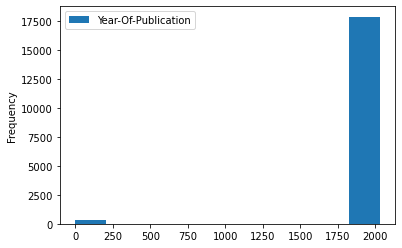

In [58]:
books.plot(kind = "hist", y = "Year-Of-Publication")

In [41]:
books.groupby("Year-Of-Publication")["ISBN"].count()

Year-Of-Publication
0        314
1920       2
1927       1
1929       1
1930       1
        ... 
2002    1750
2003    1530
2004     475
2005       3
2030       3
Name: ISBN, Length: 70, dtype: int64

In [49]:
books[books["Year-Of-Publication"] == 0].head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
164,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
195,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
285,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
343,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc
395,2070362388,Ravage,Rene Barjavel,0,Gallimard French
441,0718144538,Shattered Uk,Dick Francis,0,Michael Joseph Ltd
444,0349101779,The Wasp Factory,Iain Banks,0,Abacus
488,0753804700,Reader,Bernhard Schlink,0,Phoenix Books
650,0140620338,Picture of Dorian Gray,Oscar Wilde,0,Penguin Putnam~mass
661,000649840X,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk


In [48]:
books[books["Year-Of-Publication"] == 2030]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
11362,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
13687,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
15739,0870449842,Crossing America,National Geographic Society,2030,National Geographic


### ISBN 
Also noticed ISBN is a 10 digit number but some have and X at the end.
- ISBN is a 10 digit number before 2007. This dataset is fine for just 10.
- the only letter wich can be in an ISBN is an X to represent ten.

No duplicates on ISBN

In [57]:
books[~books["ISBN"].str.match(r"^(?=(?:\D*\d){9,10})|\d{9}X")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher


In [137]:
books[books["ISBN"].duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher


### Book-Author
Potential for Authors to be under different naming convention.
- For example Jack Du Brul vs Jack B. Du Brul
    - Do some text analysis in cleaning to give authors same name
- Also text is mix of upper/lowercase - case folding to lowercase.
- Look to see if there are any unknown names
    - unknown
    - Jack


In [95]:
author_dist = books.groupby("Book-Author")["ISBN"].count().sort_values(ascending=False).reset_index().rename(columns= {'ISBN':'Count'})

author_dist

,Book-Author,Count
0,Stephen King,193
1,Nora Roberts,123
2,Anne McCaffrey,81
3,Danielle Steel,74
4,Piers Anthony,70
...,...,...
6447,Jack Kersh,1
6448,Jack Handey,1
6449,Jack Du Brul,1
6450,Jack B. Du Brul,1


<Axes: xlabel='Count', ylabel='Book-Author'>

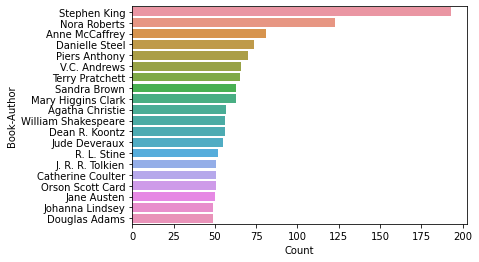

In [96]:
sns.barplot(author_dist.head(20), x = "Count", y = "Book-Author", orient = "h")

<Axes: xlabel='Count', ylabel='Book-Author'>

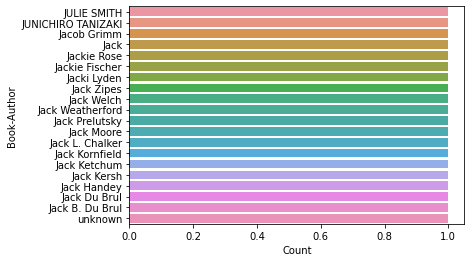

In [97]:
sns.barplot(author_dist.tail(20), x = "Count", y = "Book-Author", orient = "h")

### Book-Title
- Books can be published by other publisher
- Potential for Book-Title to be similar
- Duplicates on Book-Publisher and Book-Title
    - No concern 

<Axes: xlabel='Count', ylabel='Book-Title'>

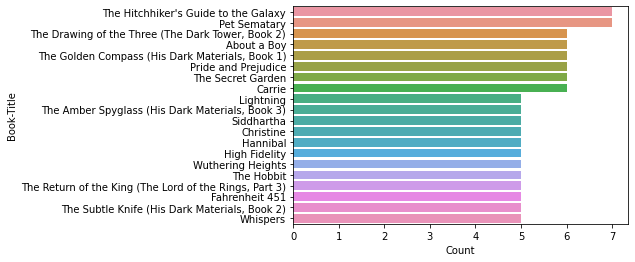

In [117]:
books_title = books.groupby(["Book-Title"])["ISBN"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'ISBN':'Count'})

duplicate_books = books_title[books_title["Count"] > 1]

sns.barplot(duplicate_books.head(20), x = "Count", y = "Book-Title", orient = "h")

In [119]:
books[books["Book-Title"].isin(duplicate_books["Book-Title"])].sort_values(by = "Book-Title").head(20)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
4643,0451168089,'Salem's Lot,Stephen King,1990,Signet Book
16688,0385007515,'Salem's Lot,Stephen King,1993,Doubleday Books
10276,0717284832,101 Dalmatians,Walt Disney,1995,Stoddart+publishing
337,0307001164,101 Dalmatians,Justine Korman,1996,Golden Books Publishing Company
14503,207036822X,1984,George Orwell,0,Gallimard French
3842,0451519841,1984,George Orwell,1980,New Amer Library
5470,0452262933,1984,George Orwell,1983,Plume Books
1117,0451524934,1984,George Orwell,1990,Signet Book
991,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision
2044,0316666009,1st to Die: A Novel,James Patterson,2001,Little Brown and Company


In [121]:
books_tp = books.groupby(["Book-Title", "Book-Publisher"])["ISBN"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'ISBN':'Count'})

In [131]:
books[books["Book-Title"].isin(books_tp["Book-Title"].head(5))].sort_values("Book-Title")

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
4650,1591820073,Chobits (Chobits),Clamp,2003,TokyoPop
4649,1591821533,Chobits (Chobits),Clamp,2003,TokyoPop
4648,1591822572,Chobits (Chobits),Clamp,2003,TokyoPop
4647,1591822580,Chobits (Chobits),Clamp,2003,TokyoPop
1528,0812533550,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books
499,0312853238,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1992,Tor Books
1020,0765342294,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,2002,Starscape Books
1168,0812550706,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1994,Tor Books
6336,0451150244,Pet Sematary,Stephen King,1984,Signet Book
9712,0451139755,Pet Sematary,Stephen King,1985,New Amer Library


### Book-Publisher
String Fuzzy match for all text data 

<Axes: xlabel='Count', ylabel='Book-Publisher'>

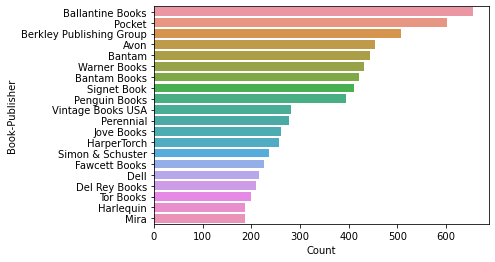

In [140]:
books_publisher = books.groupby(["Book-Publisher"])["ISBN"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'ISBN':'Count'})

sns.barplot(books_publisher.head(20), x = "Count", y = "Book-Publisher", orient = "h")

<Axes: xlabel='Count', ylabel='Book-Publisher'>

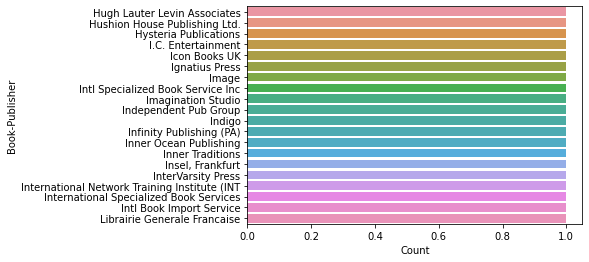

In [141]:
sns.barplot(books_publisher.tail(20), x = "Count", y = "Book-Publisher", orient = "h")

## BX-Users

In [142]:
users = pd.read_csv(path + "/BX-Users.csv")
users.columns

Index(['User-ID', 'User-City', 'User-State', 'User-Country', 'User-Age'], dtype='object')

In [69]:
users.shape

(48299, 5)

In [144]:
users.dtypes

User-ID          int64
User-City       object
User-State      object
User-Country    object
User-Age        object
dtype: object

## Initial Look 
Null values to deal with:
- User-City: 61
- User-Country: 669
- User-Age: 18952 (39.2% of users)
- User-State: 666

Can see that User-State has empty strings:' '.

Some values in columns have trailing " to remove.

In [148]:
users.isna().sum()

User-ID             0
User-City          61
User-State          0
User-Country      669
User-Age        18952
dtype: int64

In [174]:
users[users["User-City"].isna()].head(5)

,User-ID,User-City,User-State,User-Country,User-Age
385,2197,NaN,travelling,"canada""",26
616,3569,NaN,n/a,"usa""",NaN
731,4221,NaN,connecticut,"usa""",NaN
1904,11676,NaN,n/a,"n/a""",NaN
2107,12966,NaN,n/a,"singapore""",28


In [168]:
users[users["User-ID"] == 277124]["User-State"] == ' '

47963    True
Name: User-State, dtype: bool

In [175]:
users[users["User-State"] == " "].head(5)

,User-ID,User-City,User-State,User-Country,User-Age
4,19,weston,,NaN,"14"""
133,777,portland,,NaN,"13"""
160,929,king of prussia,,NaN,"36"""
196,1118,cleveland,,"usa""",NaN
198,1131,berkeley,,NaN,"22"""


In [172]:
users[users["User-State"] == " "].shape

(666, 5)

In [176]:
users[users["User-Country"].isna()].head(5)

,User-ID,User-City,User-State,User-Country,User-Age
4,19,weston,,NaN,"14"""
133,777,portland,,NaN,"13"""
160,929,king of prussia,,NaN,"36"""
198,1131,berkeley,,NaN,"22"""
284,1589,clio,michigan,NaN,"50"""


In [177]:
users[users["User-Age"].isna()].head(5)

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,"canada""",NaN
1,9,germantown,tennessee,"usa""",NaN
2,16,albuquerque,new mexico,"usa""",NaN
3,17,chesapeake,virginia,"usa""",NaN
5,26,bellevue,washington,"usa""",NaN


### Remove trailing ":

In [178]:
users["User-Country"].str.rstrip('"')

0            canada
1               usa
2               usa
3               usa
4               NaN
            ...    
48294        canada
48295        canada
48296           usa
48297     australia
48298           usa
Name: User-Country, Length: 48299, dtype: object

In [179]:
users["User-Country"]

0            canada"
1               usa"
2               usa"
3               usa"
4                NaN
            ...     
48294        canada"
48295        canada"
48296           usa"
48297     australia"
48298           usa"
Name: User-Country, Length: 48299, dtype: object

In [180]:
users["User-City"] = users["User-City"].str.rstrip('"')
users["User-State"] = users["User-State"].str.rstrip('"')
users["User-Country"] = users["User-Country"].str.rstrip('"')
users["User-Age"] = users["User-Age"].str.rstrip('"')

In [181]:
users.head(20)

,User-ID,User-City,User-State,User-Country,User-Age
0,8,timmins,ontario,canada,NaN
1,9,germantown,tennessee,usa,NaN
2,16,albuquerque,new mexico,usa,NaN
3,17,chesapeake,virginia,usa,NaN
4,19,weston,,NaN,14
5,26,bellevue,washington,usa,NaN
6,32,portland,oregon,usa,NaN
7,39,cary,north carolina,usa,NaN
8,42,appleton,wisconsin,usa,17
9,44,black mountain,north carolina,usa,51


## User-ID
No duplicates

In [184]:
users[users["User-ID"].duplicated()]

,User-ID,User-City,User-State,User-Country,User-Age


## User-City

<Axes: xlabel='Count', ylabel='User-City'>

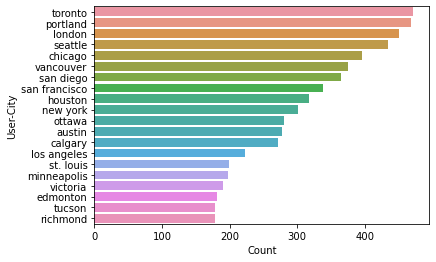

In [188]:
users_city = users.groupby(["User-City"])["User-ID"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'User-ID':'Count'})

sns.barplot(users_city.head(20), x = "Count", y = "User-City", orient = "h")

<Axes: xlabel='Count', ylabel='User-City'>

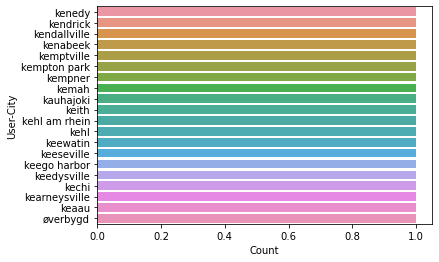

In [189]:
sns.barplot(users_city.tail(20), x = "Count", y = "User-City", orient = "h")

## User-State

<Axes: xlabel='Count', ylabel='User-State'>

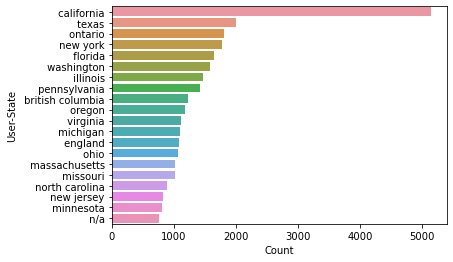

In [206]:
users_state = users.groupby(["User-State"])["User-ID"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'User-ID':'Count'})

sns.barplot(users_state.head(20), x = "Count", y = "User-State", orient = "h")

<Axes: xlabel='Count', ylabel='User-State'>

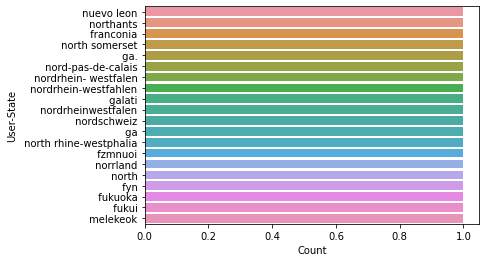

In [207]:
sns.barplot(users_state.tail(20), x = "Count", y = "User-State", orient = "h")

## User-Country

<Axes: xlabel='Count', ylabel='User-Country'>

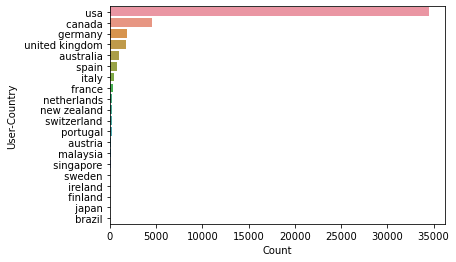

In [208]:
users_country = users.groupby(["User-Country"])["User-ID"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'User-ID':'Count'})

sns.barplot(users_city.head(20), x = "Count", y = "User-Country", orient = "h")

<Axes: xlabel='Count', ylabel='User-Country'>

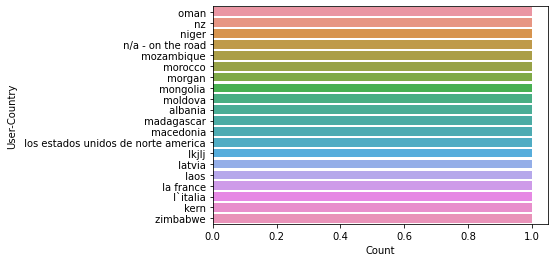

In [212]:
sns.barplot(users_country.tail(20), x = "Count", y = "User-Country", orient = "h")

## User-Age
- Ages that are NaN set to -1 and removed for analysis.
- Impute mean, based on other features.
- Ages above ~90 outliers.
- Average age is 36.2.

<Axes: xlabel='Count', ylabel='User-Age'>

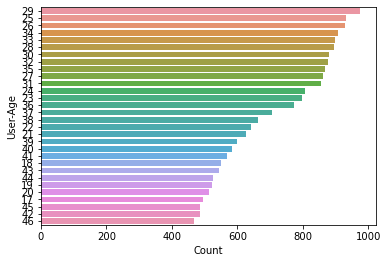

In [215]:
users_age = users.groupby(["User-Age"])["User-ID"].count() \
    .sort_values(ascending = False).reset_index().rename(columns= {'User-ID':'Count'})

sns.barplot(users_age.head(30), x = "Count", y = "User-Age", orient = "h")

<Axes: xlabel='Count', ylabel='User-Age'>

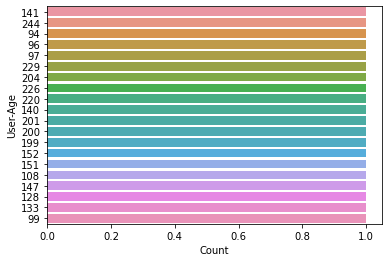

In [218]:
sns.barplot(users_age.tail(20), x = "Count", y = "User-Age", orient = "h")

In [241]:
users["User-Age"] = users["User-Age"].fillna(-1).astype(int)

/Users/caseyhaseloff/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='User-Age', ylabel='Count'>

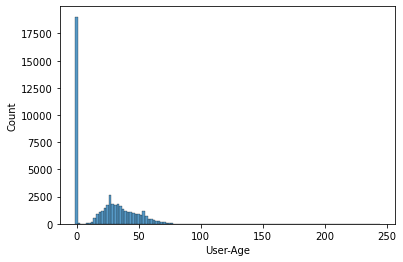

In [242]:
sns.histplot(users, x = "User-Age")

In [244]:
users_age = users[users["User-Age"] != -1]

In [246]:
users_age.describe()

,User-ID,User-Age
count,29347.000000,29347.000000
mean,139454.265751,36.204178
std,80448.399162,14.681020
min,19.000000,0.000000
25%,69601.000000,26.000000
50%,138514.000000,34.000000
75%,209461.000000,45.000000
max,278852.000000,244.000000


<Axes: xlabel='User-Age'>

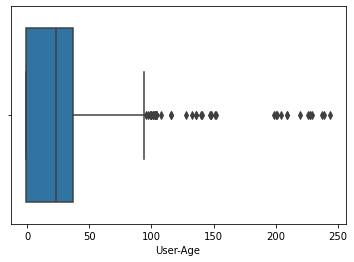

In [247]:
sns.boxplot(users, x = "User-Age")

/Users/caseyhaseloff/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='User-Age', ylabel='Count'>

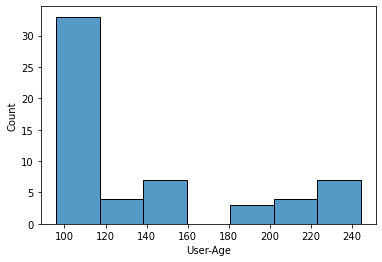

In [248]:
sns.histplot(users[users["User-Age"] > 95], x = "User-Age")

## BX-ratings

In [81]:
ratings = pd.read_csv(path + "/BX-Ratings.csv")
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')